# How to run a RL algorithm given a config file
- Step 1: Run ***python load_model.py --file config_file*** to generate python files based on which we can automatically generate a GYM environment;
- Step 2: Run ***python data_collection.py --env CSTR --algo MPC*** to collect data for training offline RL, where ***env*** and ***algo*** denote environment and algorithm to use, respectively.
- Step 3: Run ***python rl_training.py --env CSTR --algo CQL*** to train an offline RL policy
- Step 4: Run ***python algo_evaluation.py --plt --num_episodes 10 --env CSTR --algo CQL*** to evaluate the ***CQL*** policy for ***num_episodes*** rounds. Set ***plt*** to plot all results.

In [11]:
from algo_evaluation import evaluate_algorithms, OfflineRLModel
import importlib
import pandas as pd

algorithm_names = ["CQL", "MOPO"]
algorithms = []
env_name = "CSTR"
num_episodes = 2

best_model_loc = f"./d3rlpy_logs/{env_name}/random_42"

for algo_name in algorithm_names:
    algo = OfflineRLModel(algo_name, best_model_loc)
    algorithms.append((algo, algo_name))

env_lib = importlib.import_module(f"examples.{env_name}.template_env")
env = env_lib.get_env()
observations_list, actions_list, rewards_list = evaluate_algorithms(env, algorithms, num_episodes=num_episodes)

df_data = []
for n_algo, algo_name in enumerate(algorithm_names):
    for epi in range(num_episodes):
        for i in range(rewards_list.shape[-1]):
            df_data.append(observations_list[n_algo, epi, i].tolist() + actions_list[n_algo, epi, i].tolist() + [rewards_list[n_algo, epi, i], algo_name, epi, i])
df = pd.DataFrame(data=df_data, columns=env.observation_name+env.action_name+["reward", "algo_name", "episode", "step"])
df.head()


2023-03-30 14:25:26 [warning  ] Unused arguments are passed.   algorithm=CQL generated_maxlen=100000 real_ratio=1.0
2023-03-30 14:25:26 [warning  ] Unused arguments are passed.   algorithm=MOPO


/anaconda/envs/env38/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


,C_a,C_b,T_R,T_K,F,Q_dot,reward,algo_name,episode,step
0,1.799714,1.337693,108.018086,94.623806,29.823515,-1505.715332,-9.489241,CQL,0,0
1,1.923265,1.279926,108.062369,98.098753,14.384494,-3030.053711,-7.721866,CQL,0,1
2,1.894256,1.249192,109.084452,99.117325,10.052924,-6602.611816,-7.289150,CQL,0,2
3,1.942019,1.225956,108.773676,99.662486,9.484991,-7142.472656,-6.565082,CQL,0,3
4,1.950208,1.206448,108.852835,99.713727,8.588575,-7809.193848,-6.351869,CQL,0,4


No such comm: 0bdf212f7e014396a31846af80543801
No such comm: 0bdf212f7e014396a31846af80543801
No such comm: 0bdf212f7e014396a31846af80543801
No such comm: 0bdf212f7e014396a31846af80543801
No such comm: 0bdf212f7e014396a31846af80543801
No such comm: 0bdf212f7e014396a31846af80543801
No such comm: a7fa44ae3ddd4504bc6cdde602d252aa
No such comm: a7fa44ae3ddd4504bc6cdde602d252aa
No such comm: a7fa44ae3ddd4504bc6cdde602d252aa
No such comm: a7fa44ae3ddd4504bc6cdde602d252aa
No such comm: a7fa44ae3ddd4504bc6cdde602d252aa
No such comm: a7fa44ae3ddd4504bc6cdde602d252aa


In [12]:
from ipywidgets import *
from vis_utility import layout_generator

children_dw = []
header = Button(
        description="Plot Configuraion",
        layout=Layout(width="auto", grid_area="header"),
        style=ButtonStyle(button_color="lightblue"),
    )

episode_dw = Dropdown(
            options=[0] + list(range(1, num_episodes+1)),
            value=0,
            description="Episode:",
        )

cols_dw = Dropdown(
            options=env.observation_name+env.action_name+["reward"],
            value=env.observation_name[0],
            description="Value:",
        )


children_dw.extend([episode_dw, cols_dw])

grid = layout_generator(header, children_dw, num_cols=1, col_width=800)
display(grid)

GridspecLayout(children=(Button(description='Plot Configuraion', layout=Layout(grid_area='widget001', width='a…

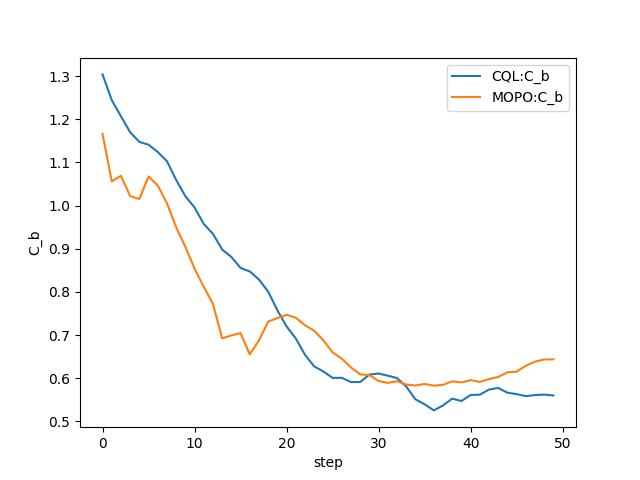

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
select_episode = episode_dw.value
col = cols_dw.value

if select_episode == 0:
    plot_df = df[["algo_name", "step"]+[col]].groupby(["algo_name", "step"]).mean().reset_index()
else: plot_df = df.loc[df["episode"] == select_episode, ["algo_name", "step"]+[col]]

fig, ax = plt.subplots()
for algo_name in algorithm_names:
    plot_df.loc[plot_df["algo_name"]==algo_name, :].plot('step', col, ax=ax, label=f"{algo_name}:{col}")
plt.xlabel("step")
plt.ylabel(col)
plt.show()
